In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import re



We found an API option, which would be easier then scraping but did the scraping anyway 

https://pypi.org/project/weathercom/



In [2]:
# (chrome) Webscraper plugin identifies elements to apply to Pandas function, identical to Chrome's Developer Tools


Here are the result from the Chrome Plugin 

In [3]:
df = pd.read_csv('./result.csv')
df


,DayDate,Temp,Desc
0,"<span class=""DailyContent--daypartDate--3MM0J""...","<span data-testid=""TemperatureValue"" class=""Da...","<p data-testid=""wxPhrase"" class=""DailyContent-..."
1,"<span class=""DailyContent--daypartDate--3MM0J""...","<span data-testid=""TemperatureValue"" class=""Da...","<p data-testid=""wxPhrase"" class=""DailyContent-..."
2,"<span class=""DailyContent--daypartDate--3MM0J""...","<span data-testid=""TemperatureValue"" class=""Da...","<p data-testid=""wxPhrase"" class=""DailyContent-..."
3,"<span class=""DailyContent--daypartDate--3MM0J""...","<span data-testid=""TemperatureValue"" class=""Da...","<p data-testid=""wxPhrase"" class=""DailyContent-..."
4,"<span class=""DailyContent--daypartDate--3MM0J""...","<span data-testid=""TemperatureValue"" class=""Da...","<p data-testid=""wxPhrase"" class=""DailyContent-..."
5,"<span class=""DailyContent--daypartDate--3MM0J""...","<span data-testid=""TemperatureValue"" class=""Da...","<p data-testid=""wxPhrase"" class=""DailyContent-..."
6,"<span class=""DailyContent--daypartDate--3MM0J""...","<span data-testid=""TemperatureValue"" class=""Da...","<p data-testid=""wxPhrase"" class=""DailyContent-..."
7,"<span class=""DailyContent--daypartDate--3MM0J""...","<span data-testid=""TemperatureValue"" class=""Da...","<p data-testid=""wxPhrase"" class=""DailyContent-..."
8,"<span class=""DailyContent--daypartDate--3MM0J""...","<span data-testid=""TemperatureValue"" class=""Da...","<p data-testid=""wxPhrase"" class=""DailyContent-..."
9,"<span class=""DailyContent--daypartDate--3MM0J""...","<span data-testid=""TemperatureValue"" class=""Da...","<p data-testid=""wxPhrase"" class=""DailyContent-..."


In [4]:
# get the web page
page = requests.get("https://weather.com/weather/tenday/l/69bedc6a5b6e977993fb3e5344e3c06d8bc36a1fb6754c3ddfb5310a3c6d6c87")
#parse html
soup = BeautifulSoup(page.content, 'html.parser')
#Grab the varibales we need 
dailysummary = soup.find_all(class_="DailyContent--narrative--3AcXd")
temp = soup.find_all(class_="DailyContent--temp--_8DL5")
date = soup.find_all(class_="DailyContent--daypartDate--3MM0J")

print(date)
print(dailysummary)
print(temp)

[<span class="DailyContent--daypartDate--3MM0J">Wed 09</span>, <span class="DailyContent--daypartDate--3MM0J">Wed 09</span>, <span class="DailyContent--daypartDate--3MM0J">Thu 10</span>, <span class="DailyContent--daypartDate--3MM0J">Thu 10</span>, <span class="DailyContent--daypartDate--3MM0J">Fri 11</span>, <span class="DailyContent--daypartDate--3MM0J">Fri 11</span>, <span class="DailyContent--daypartDate--3MM0J">Sat 12</span>, <span class="DailyContent--daypartDate--3MM0J">Sat 12</span>, <span class="DailyContent--daypartDate--3MM0J">Sun 13</span>, <span class="DailyContent--daypartDate--3MM0J">Sun 13</span>, <span class="DailyContent--daypartDate--3MM0J">Mon 14</span>, <span class="DailyContent--daypartDate--3MM0J">Mon 14</span>, <span class="DailyContent--daypartDate--3MM0J">Tue 15</span>, <span class="DailyContent--daypartDate--3MM0J">Tue 15</span>, <span class="DailyContent--daypartDate--3MM0J">Wed 16</span>, <span class="DailyContent--daypartDate--3MM0J">Wed 16</span>, <span c

In [5]:
# -*- coding: utf-8 -*-
# Tidy up data
dateClean = []
dayClean = []
tempClean = []
sumClean = []
dn = []

for d in date:
    dd = d.get_text()
    ddd = dd.split(" ")
    dateClean.append(ddd[1])
    dayClean.append(ddd[0])

for t in temp:
    tst = t.get_text()
    tt = re.sub('[^0-9]', '', tst)
    # T(°C) = (T(°F) - 32) × 5/9
    tc = (int(tt)-32) * 5/9
    tempClean.append(tc)

for s in dailysummary:
    ss = s.get_text()
    sumClean.append(ss)

for i in range(0,30):
    if i % 2 !=0:
        dn.append("d")
    else:
        dn.append("n")  

  
data_dict = {"day": dayClean, "date": dateClean, "temp": tempClean, 'Summary': sumClean, "day/night":dn}
#print(dateClean)
#print(dayClean)
#print(tempClean)
print(len(sumClean))
print(data_dict)

30
{'day': ['Wed', 'Wed', 'Thu', 'Thu', 'Fri', 'Fri', 'Sat', 'Sat', 'Sun', 'Sun', 'Mon', 'Mon', 'Tue', 'Tue', 'Wed', 'Wed', 'Thu', 'Thu', 'Fri', 'Fri', 'Sat', 'Sat', 'Sun', 'Sun', 'Mon', 'Mon', 'Tue', 'Tue', 'Wed', 'Wed'], 'date': ['09', '09', '10', '10', '11', '11', '12', '12', '13', '13', '14', '14', '15', '15', '16', '16', '17', '17', '18', '18', '19', '19', '20', '20', '21', '21', '22', '22', '23', '23'], 'temp': [16.11111111111111, 5.555555555555555, 12.777777777777779, 5.555555555555555, 11.666666666666666, 6.111111111111111, 12.777777777777779, 7.222222222222222, 13.333333333333334, 7.222222222222222, 13.333333333333334, 5.555555555555555, 12.777777777777779, 6.111111111111111, 12.777777777777779, 6.666666666666667, 13.333333333333334, 6.111111111111111, 12.777777777777779, 5.555555555555555, 13.88888888888889, 5.555555555555555, 14.444444444444445, 5.0, 13.88888888888889, 4.444444444444445, 14.444444444444445, 4.444444444444445, 14.444444444444445, 4.444444444444445], 'Summary'

Here we decided to try 2 fdifferent approachs, the first uses pyhton to manipulate the data, the second uses pandas to manipulate the data. 


In [6]:
#Make changes to data before pandas 
nDay = dayClean[::2]
nDate = dateClean[::2]
high = []
low = []
new_sum = []

for te in tempClean:
    ind = tempClean.index(te)
    if ind % 2 != 0:
        ns = "Day: " + sumClean[ind] + "Night: " + sumClean[ind+1]
        high.append(te)
        new_sum.append(ns)
    else: 
        low.append(te)

new_data_dict = {"date":nDate, "day":nDay, "summary":new_sum, "highTemp":high, "lowTemp": low}
w_dn = pd.DataFrame(new_data_dict)
w_dn

,date,day,summary,highTemp,lowTemp
0,09,Wed,Day: Partly to mostly cloudy. Low 42F. Winds l...,5.555556,16.111111
1,10,Thu,Day: Partly to mostly cloudy. Low 42F. Winds l...,5.555556,12.777778
2,11,Fri,Day: Mostly cloudy with some showers late. Low...,6.111111,11.666667
3,12,Sat,Day: Cloudy with occasional showers late at ni...,7.222222,12.777778
4,13,Sun,Day: Cloudy with occasional showers late at ni...,7.222222,13.333333
5,14,Mon,Day: Partly to mostly cloudy. Low 42F. Winds l...,5.555556,13.333333
6,15,Tue,Day: Mostly cloudy with some showers late. Low...,6.111111,12.777778
7,16,Wed,Day: Overcast with rain showers at times. Low ...,6.666667,12.777778
8,17,Thu,Day: Mostly cloudy with some showers late. Low...,6.111111,13.333333
9,18,Fri,Day: Partly to mostly cloudy. Low 42F. Winds l...,5.555556,12.777778


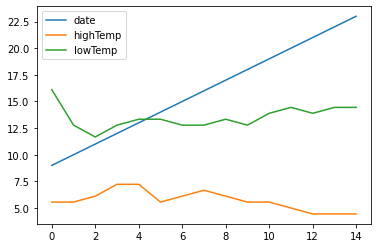

In [7]:
#Making the mat plot lib 
# this only works in Juypter note book not deepnote 
w_dn['date'] = w_dn['date'].astype(float)
w_dn.plot()
plt.show()

## Second approach 

In [8]:
weather1  = pd.DataFrame(data_dict)
weather2 = weather1
weather3 = weather1
#print(weather2.drop_duplicates('date'))
#print(weather3.drop_duplicates('date',keep='last'))
weather2 = weather2.drop_duplicates('date')
weather3 = weather3.drop_duplicates('date',keep='last')

weather2 = weather2.reset_index()
weather3 = weather3.reset_index()
weather2 = weather2.rename(columns={'temp':'highTemp', 'Summary':'Day_Summary'})
weather3 = weather3.rename(columns={'temp':"lowTemp", 'Summary' : 'Night_Summary'})


Comdf = weather2.merge(weather3,how='inner', on=['day','date'])

finalframe = Comdf[["day","date","highTemp","lowTemp","Day_Summary","Night_Summary"]]
finalframe


#thanks

#weather2.

,day,date,highTemp,lowTemp,Day_Summary,Night_Summary
0,Wed,09,16.111111,5.555556,Partly cloudy. High 61F. Winds N at 5 to 10 mph.,Partly to mostly cloudy. Low 42F. Winds light ...
1,Thu,10,12.777778,5.555556,Sun and a few passing clouds. High around 55F....,Mostly clear during the evening followed by mo...
2,Fri,11,11.666667,6.111111,Intervals of clouds and sunshine in the mornin...,Mostly cloudy with some showers late. Low 43F....
3,Sat,12,12.777778,7.222222,Cloudy with showers. High around 55F. Winds S ...,Cloudy with occasional showers late at night. ...
4,Sun,13,13.333333,7.222222,Rain early...then remaining cloudy with shower...,Rain showers in the evening becoming more inte...
5,Mon,14,13.333333,5.555556,Intervals of clouds and sunshine. High 56F. Wi...,Mostly clear skies early then becoming mostly ...
6,Tue,15,12.777778,6.111111,Partly cloudy skies. High near 55F. Winds W at...,Partly cloudy skies early followed by increasi...
7,Wed,16,12.777778,6.666667,Mostly cloudy with some showers in the afterno...,Overcast with rain showers at times. Low 44F. ...
8,Thu,17,13.333333,6.111111,Considerable cloudiness with occasional rain s...,Mainly cloudy. Low 43F. Winds WNW at 5 to 10 mph.
9,Fri,18,12.777778,5.555556,A few showers early with mostly cloudy conditi...,Cloudy with occasional showers. Low 42F. Winds...


##Sergey Brin

Each "h2" element as a column of you final pandas dataframe

What can you scrape that makes sense? Think about creating a dataset. 
Places, dates, content. Some values will be NaN.

In [9]:
sg_site = requests.get('http://infolab.stanford.edu/~sergey/resume.html')
sg_soup = BeautifulSoup(sg_site.content, 'html.parser')

h_2_tags = sg_soup.find_all('h2')
cols = []
for h in h_2_tags:
    cols.append(h.get_text())

#print(sg_soup.prettify())

##Some Other Websites - Football transfers 

Scraping bonus task 

In [10]:
f_pages = requests.get ('https://www.ox.ac.uk/admissions/undergraduate/courses/course-listing')
f_soup = BeautifulSoup(f_pages.content, 'html.parser')
f_body = f_soup.find("body")
#tbc 

This is the 2 line version of the approach above 

In [13]:
# the one line version 
weather1  = pd.DataFrame(data_dict)
weather2 = weather1
weather3 = weather1

weather2 = weather2.drop_duplicates('date').reset_index().rename(columns={'temp':'highTemp', 'Summary':'Day_Summary'})
weather3 = weather3.drop_duplicates('date',keep='last').reset_index().rename(columns={'temp':"lowTemp", 'Summary' : 'Night_Summary'})

Comdf = weather2.merge(weather3,how='inner', on=['day','date'])

finalframe = Comdf[["day","date","highTemp","lowTemp","Day_Summary","Night_Summary"]]
finalframe['highTemp'] = finalframe['highTemp'].round(decimals=2)
finalframe['lowTemp'] = finalframe['lowTemp'].round(decimals=2)
finalframe.head(10)



/root/anaconda3/envs/working/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/root/anaconda3/envs/working/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,day,date,highTemp,lowTemp,Day_Summary,Night_Summary
0,Wed,09,16.11,5.56,Partly cloudy. High 61F. Winds N at 5 to 10 mph.,Partly to mostly cloudy. Low 42F. Winds light ...
1,Thu,10,12.78,5.56,Sun and a few passing clouds. High around 55F....,Mostly clear during the evening followed by mo...
2,Fri,11,11.67,6.11,Intervals of clouds and sunshine in the mornin...,Mostly cloudy with some showers late. Low 43F....
3,Sat,12,12.78,7.22,Cloudy with showers. High around 55F. Winds S ...,Cloudy with occasional showers late at night. ...
4,Sun,13,13.33,7.22,Rain early...then remaining cloudy with shower...,Rain showers in the evening becoming more inte...
5,Mon,14,13.33,5.56,Intervals of clouds and sunshine. High 56F. Wi...,Mostly clear skies early then becoming mostly ...
6,Tue,15,12.78,6.11,Partly cloudy skies. High near 55F. Winds W at...,Partly cloudy skies early followed by increasi...
7,Wed,16,12.78,6.67,Mostly cloudy with some showers in the afterno...,Overcast with rain showers at times. Low 44F. ...
8,Thu,17,13.33,6.11,Considerable cloudiness with occasional rain s...,Mainly cloudy. Low 43F. Winds WNW at 5 to 10 mph.
9,Fri,18,12.78,5.56,A few showers early with mostly cloudy conditi...,Cloudy with occasional showers. Low 42F. Winds...
